In [1]:
import ast 
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)  # This converts the string representation to an actual list

In [2]:
# Filter for Data Analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Remove rows where 'salary_year_avg' is NaN
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [3]:
# Make each skill its own row
df_DA_US_exploded = df_DA_US.explode('job_skills')

# Now group works fine
df_DA_US_group = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

# Top 10 by pay
df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

# Top 10 by count, then sort by median salary
df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)
                                                                     # We put .sort_values(by='median', ascending=False) at the end 
                                                                     # so that the 10 most popular skills are still chosen,
                                                                     # but displayed in order of salary → makes the chart clearer and
                                                                     # tells a different story (pay, not just demand).) 

print(df_DA_top_pay)
print(df_DA_skills)


              count    median
job_skills                   
dplyr             2  196250.0
bitbucket         3  189000.0
gitlab            3  186000.0
solidity          1  179000.0
hugging face      1  175000.0
couchbase         1  160515.0
ansible           1  159640.0
mxnet             2  149000.0
cassandra         6  148250.0
vmware            1  147500.0
            count    median
job_skills                 
python       1431  97500.00
tableau      1364  92875.00
r             893  92500.00
sql server    286  92500.00
sql          2508  91000.00
sas           926  90000.00
power bi      838  90000.00
powerpoint    462  85000.00
excel        1808  84392.00
word          461  81194.75


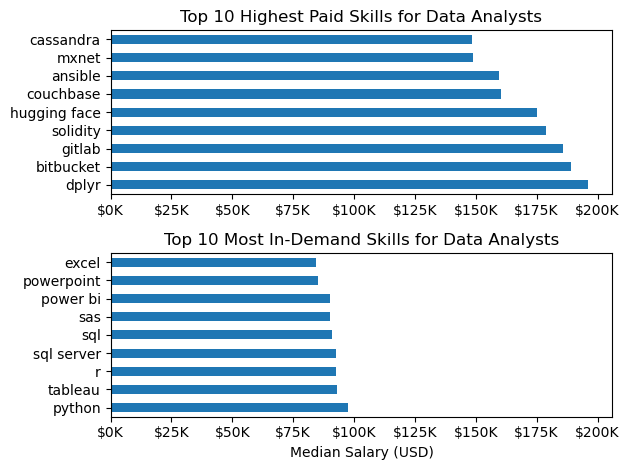

In [4]:
fig, ax = plt.subplots(2,1)
# Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay[:-1].plot(kind='barh', y='median', ax=ax[0], legend=False) # [:-1] to exclude the last row which is "nan"
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Top 10 Most In-Demand Skills for Data Analysts
df_DA_skills[:-1].plot(kind='barh', y='median', ax=ax[1], legend=False) # [:-1] to exclude the last row which is "nan"
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()